In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.applications import MobileNetV2
from keras import layers
from keras import models

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Copy traindata

In [4]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/train  /content

#Load Dataset

In [5]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/preprocessing.py  /content

In [6]:
import preprocessing

In [7]:
X_train, X_val, y_train, y_val = preprocessing.loadData()

## model

In [8]:
img_size = 128

In [9]:
conv_base = MobileNetV2(weights='imagenet',  
    input_shape=(img_size, img_size, 3),
    include_top=False)

In [10]:
conv_base.trainable = False

In [11]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 256)               5243136   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 7,501,377
Trainable params: 5,243,393
Non-trainable params: 2,257,984
______________________________________

In [13]:
import math
initial_learning_rate = 0.0001
epochs = 25
decay = initial_learning_rate / epochs
def lr_exp_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])

In [14]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs = epochs,
    shuffle=True,
    validation_data = (X_val, y_val),
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay)],
) 

Epoch 1/25
150/150 [==============================] - 22s 59ms/step - loss: 0.2592 - accuracy: 0.8936 - val_loss: 0.1245 - val_accuracy: 0.9496 - lr: 1.0000e-04
Epoch 2/25
150/150 [==============================] - 6s 39ms/step - loss: 0.1153 - accuracy: 0.9596 - val_loss: 0.0894 - val_accuracy: 0.9667 - lr: 1.0000e-04
Epoch 3/25
150/150 [==============================] - 6s 39ms/step - loss: 0.0920 - accuracy: 0.9663 - val_loss: 0.0953 - val_accuracy: 0.9629 - lr: 9.9999e-05
Epoch 4/25
150/150 [==============================] - 6s 39ms/step - loss: 0.0753 - accuracy: 0.9727 - val_loss: 0.0725 - val_accuracy: 0.9717 - lr: 9.9998e-05
Epoch 5/25
150/150 [==============================] - 6s 39ms/step - loss: 0.0730 - accuracy: 0.9761 - val_loss: 0.0679 - val_accuracy: 0.9725 - lr: 9.9996e-05
Epoch 6/25
150/150 [==============================] - 6s 39ms/step - loss: 0.0604 - accuracy: 0.9795 - val_loss: 0.0827 - val_accuracy: 0.9667 - lr: 9.9994e-05
Epoch 7/25
150/150 [===================

In [15]:
model.save('./mobileNet.h5', overwrite=True)

# plot acc

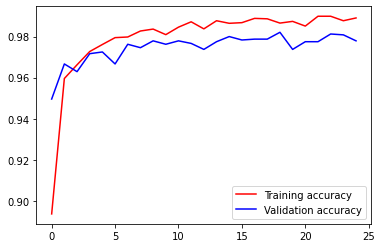

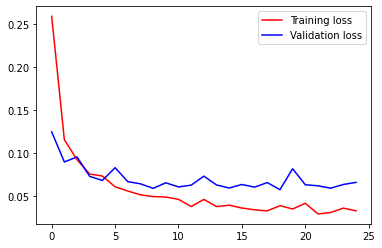

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy', color="r")
plt.plot(epochs, val_acc, label='Validation accuracy', color="b")
# plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color="r")
plt.plot(epochs, val_loss, label='Validation loss', color="b")
# plt.title('Training and validation loss')
plt.legend()

plt.show()